In [26]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
train = pd.read_csv("./data/train.csv", sep=",")
test = pd.read_csv("./data/test.csv", sep=",")
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
train.isnull().sum()[train.isnull().sum()>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [9]:
test.isnull().sum()[test.isnull().sum()>0].sort_values(ascending=False)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64

In [12]:
na_list_train = train.isnull().sum()[train.isnull().sum()>0].index.tolist()
train[na_list_train].dtypes.sort_values()

LotFrontage     float64
MasVnrArea      float64
GarageYrBlt     float64
PoolQC           object
GarageCond       object
GarageQual       object
GarageFinish     object
GarageType       object
FireplaceQu      object
Electrical       object
BsmtFinType2     object
BsmtFinType1     object
BsmtExposure     object
BsmtCond         object
BsmtQual         object
MasVnrType       object
Alley            object
Fence            object
MiscFeature      object
dtype: object

In [13]:
na_list_test = test.isnull().sum()[test.isnull().sum()>0].index.tolist()
test[na_list_test].dtypes.sort_values()

TotalBsmtSF     float64
BsmtUnfSF       float64
BsmtFinSF2      float64
BsmtFinSF1      float64
GarageYrBlt     float64
BsmtFullBath    float64
GarageCars      float64
BsmtHalfBath    float64
GarageArea      float64
LotFrontage     float64
MasVnrArea      float64
GarageQual       object
GarageCond       object
GarageType       object
PoolQC           object
FireplaceQu      object
Fence            object
Functional       object
GarageFinish     object
MSZoning         object
MiscFeature      object
BsmtFinType2     object
BsmtFinType1     object
BsmtExposure     object
BsmtCond         object
BsmtQual         object
MasVnrType       object
Exterior2nd      object
Exterior1st      object
Utilities        object
Alley            object
KitchenQual      object
SaleType         object
dtype: object

In [14]:
train['WhatIsData'] = 'Train'
test["WhatIsData"] = "Test"
test["SalePrice"] = 99999999
alldata = pd.concat([train,test],axis=0).reset_index(drop=True)

/Users/hirokiyamaoka/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [18]:
cat_cols = alldata.dtypes[alldata.dtypes=='object'].index.tolist()
num_cols = alldata.dtypes[alldata.dtypes!='object'].index.tolist()
other_cols = ["Id", "WhatIsData"]
cat_cols.remove("WhatIsData")
num_cols.remove("Id")
alldata_cat = pd.get_dummies(alldata[cat_cols])
all_data = pd.concat([alldata[other_cols], alldata[num_cols], alldata_cat], axis=1)
all_data.head(5)

,Id,WhatIsData,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,1,Train,856,854,0,3,706.0,0.0,1.0,0.0,...,0,0,0,0,0,1,0,1,1,0
1,2,Train,1262,0,0,3,978.0,0.0,0.0,1.0,...,0,0,0,0,0,1,0,1,1,0
2,3,Train,920,866,0,3,486.0,0.0,1.0,0.0,...,0,0,0,0,0,1,0,1,1,0
3,4,Train,961,756,0,3,216.0,0.0,1.0,0.0,...,0,0,0,0,0,1,0,1,1,0
4,5,Train,1145,1053,0,4,655.0,0.0,1.0,0.0,...,0,0,0,0,0,1,0,1,1,0


In [19]:
import seaborn as sns

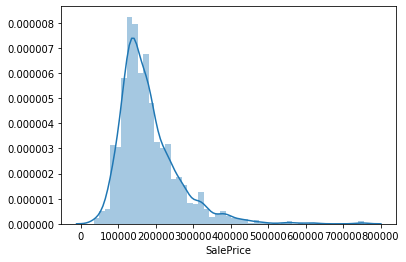

In [20]:
sns.distplot(train["SalePrice"])

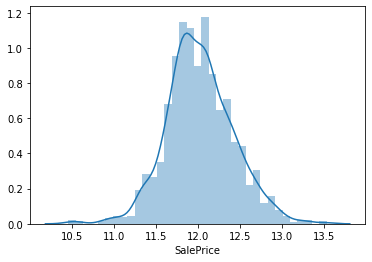

In [21]:
sns.distplot(np.log(train["SalePrice"]))

In [60]:
train_ = all_data[all_data["WhatIsData"]=="Train"].drop(["WhatIsData", "Id"], axis=1).reset_index(drop=True)
test_ = all_data[all_data["WhatIsData"]=="Test"].drop(["WhatIsData", "SalePrice"], axis=1).reset_index(drop=True)
#　訓練データの分割
train_x = train_.drop("SalePrice", axis=1)
train_y = np.log(train["SalePrice"])
# テストデータの分割
test_id = test_["Id"]
test_data = test_.drop("Id", axis=1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=0)

In [24]:
import lightgbm as lgb

In [57]:
lgb_train = lgb.Dataset(np.array(X_train), np.array(y_train))
lgb_eval = lgb.Dataset(np.array(X_test), np.array(y_test), reference=lgb_train)

params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2'},
    'num_leaves': 128,
    'learning_rate': 0.01,
    'num_iterations':1000,
    'feature_fraction': 0.38,
    'bagging_fraction': 0.68,
    'bagging_freq': 5,
    'verbose': 0
}
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1500,
                valid_sets=lgb_eval,
                early_stopping_rounds=15)
 
y_test_pred_lgb = gbm.predict(np.array(test_data), num_iteration=gbm.best_iteration)

[1]	valid_0's l2: 0.148921
Training until validation scores don't improve for 15 rounds
[2]	valid_0's l2: 0.146457
[3]	valid_0's l2: 0.144132
[4]	valid_0's l2: 0.141749
[5]	valid_0's l2: 0.139705
[6]	valid_0's l2: 0.137672
[7]	valid_0's l2: 0.135342
[8]	valid_0's l2: 0.13346
[9]	valid_0's l2: 0.131299
[10]	valid_0's l2: 0.129248
[11]	valid_0's l2: 0.127239
[12]	valid_0's l2: 0.125229
[13]	valid_0's l2: 0.123349
[14]	valid_0's l2: 0.121402
[15]	valid_0's l2: 0.119503
[16]	valid_0's l2: 0.117617
[17]	valid_0's l2: 0.1159
[18]	valid_0's l2: 0.114184
[19]	valid_0's l2: 0.112394
[20]	valid_0's l2: 0.110681
[21]	valid_0's l2: 0.108958
[22]	valid_0's l2: 0.107236
[23]	valid_0's l2: 0.10558
[24]	valid_0's l2: 0.104003
[25]	valid_0's l2: 0.102412
[26]	valid_0's l2: 0.100821
[27]	valid_0's l2: 0.0992289
[28]	valid_0's l2: 0.0976936
[29]	valid_0's l2: 0.0961841
[30]	valid_0's l2: 0.0946903
[31]	valid_0's l2: 0.0935076
[32]	valid_0's l2: 0.092077
[33]	valid_0's l2: 0.0907385
[34]	valid_0's l2: 0.0

[363]	valid_0's l2: 0.0181488
[364]	valid_0's l2: 0.0181471
[365]	valid_0's l2: 0.0181447
[366]	valid_0's l2: 0.0181441
[367]	valid_0's l2: 0.0181379
[368]	valid_0's l2: 0.018134
[369]	valid_0's l2: 0.0181249
[370]	valid_0's l2: 0.0181249
[371]	valid_0's l2: 0.0181271
[372]	valid_0's l2: 0.0181228
[373]	valid_0's l2: 0.0181187
[374]	valid_0's l2: 0.0181083
[375]	valid_0's l2: 0.0181025
[376]	valid_0's l2: 0.0180876
[377]	valid_0's l2: 0.0180881
[378]	valid_0's l2: 0.0180851
[379]	valid_0's l2: 0.0180793
[380]	valid_0's l2: 0.0180657
[381]	valid_0's l2: 0.0180581
[382]	valid_0's l2: 0.0180438
[383]	valid_0's l2: 0.0180286
[384]	valid_0's l2: 0.018016
[385]	valid_0's l2: 0.0179991
[386]	valid_0's l2: 0.0179933
[387]	valid_0's l2: 0.0179819
[388]	valid_0's l2: 0.0179775
[389]	valid_0's l2: 0.0179724
[390]	valid_0's l2: 0.0179764
[391]	valid_0's l2: 0.0179643
[392]	valid_0's l2: 0.0179566
[393]	valid_0's l2: 0.0179582
[394]	valid_0's l2: 0.0179523
[395]	valid_0's l2: 0.0179486
[396]	valid_

[717]	valid_0's l2: 0.0169063
[718]	valid_0's l2: 0.0169032
[719]	valid_0's l2: 0.0169025
[720]	valid_0's l2: 0.0168983
[721]	valid_0's l2: 0.0168949
[722]	valid_0's l2: 0.0168986
[723]	valid_0's l2: 0.0168941
[724]	valid_0's l2: 0.0168978
[725]	valid_0's l2: 0.0169022
[726]	valid_0's l2: 0.0169107
[727]	valid_0's l2: 0.0169095
[728]	valid_0's l2: 0.0169125
[729]	valid_0's l2: 0.0169184
[730]	valid_0's l2: 0.0169108
[731]	valid_0's l2: 0.0169139
[732]	valid_0's l2: 0.0169128
[733]	valid_0's l2: 0.0169111
[734]	valid_0's l2: 0.0169123
[735]	valid_0's l2: 0.0169175
[736]	valid_0's l2: 0.016914
[737]	valid_0's l2: 0.0169104
[738]	valid_0's l2: 0.0169066
Early stopping, best iteration is:
[723]	valid_0's l2: 0.0168941


In [58]:
train_rmse = np.sqrt(mean_squared_error(y_train, gbm.predict(np.array(X_train), num_iteration=gbm.best_iteration)))
test_rmse = np.sqrt(mean_squared_error(y_test, gbm.predict(np.array(X_test), num_iteration=gbm.best_iteration)))
print(train_rmse)
print(test_rmse)

0.07046519882377753
0.12997742701465007


In [81]:
test_SalePrice = pd.DataFrame(np.exp(y_test_pred_lgb), columns=["SalePrice"])

In [82]:
test_Id = pd.DataFrame(test_id,columns=['Id'])

In [83]:
pd.concat([test_Id, test_SalePrice], axis=1).to_csv("./data/output.csv", index=False)